## OESON Internship Project 2

We are going to analyse a HR Dataset.
Insights involve:
- What are the favourite positions via gender?
- What are the favourite department categories by gender?
- What is the salary distribution via gender?
- What is the manager distribution via gender?

- Top employees for each department
- Number of employees terminated for each department
- Reasons why + list of individual employees - recommend stronger background checks and living areas

- Best Managers via Employment Satisfaction
- Best Managers via the Engagenemtn Survey

After this, we will do a range of descriptive statistics and correlation summaries.

In [2]:
import pandas as pd
import numpy as np

from scipy.stats import describe
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
HR_uncleaned = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\OESON Data Science Internship\HRDataset_v14.csv")
HR_uncleaned
# There are 9 values which are null values in the ManagerID column for Webster Butler, this is a simple mistake
# where Webster Butler's Manager ID is 39. We replace the null values with 39 manually in Microsoft Excel.

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,09-02-2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,02-01-2019,0,11


## Data Cleaning

In [8]:
HR_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [10]:
cleaningdf = HR_uncleaned[["ManagerName", "ManagerID"]]
cleaningdf

,ManagerName,ManagerID
0,Michael Albert,22.0
1,Simon Roup,4.0
2,Kissy Sullivan,20.0
3,Elijiah Gray,16.0
4,Webster Butler,39.0
...,...,...
306,Kissy Sullivan,20.0
307,Brannon Miller,12.0
308,Janet King,2.0
309,Simon Roup,4.0


In [11]:
def data_cleaning(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [12]:
data_cleaning(HR_uncleaned)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Employee_Name,0,0,0.000000,311,object
EmpID,0,0,0.000000,311,int64
MarriedID,0,0,0.000000,2,int64
MaritalStatusID,0,0,0.000000,5,int64
GenderID,0,0,0.000000,2,int64
EmpStatusID,0,0,0.000000,5,int64
DeptID,0,0,0.000000,6,int64
PerfScoreID,0,0,0.000000,4,int64
FromDiversityJobFairID,0,0,0.000000,2,int64
Salary,0,0,0.000000,308,int64


In [90]:
HR = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\OESON Data Science Internship\HRDataset_cleaned.xlsb.csv")

In [91]:
data_cleaning(HR)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
Employee_Name,0,0,0.0,311,object
EmpID,0,0,0.0,311,int64
MarriedID,0,0,0.0,2,int64
MaritalStatusID,0,0,0.0,5,int64
GenderID,0,0,0.0,2,int64
EmpStatusID,0,0,0.0,5,int64
DeptID,0,0,0.0,6,int64
PerfScoreID,0,0,0.0,4,int64
FromDiversityJobFairID,0,0,0.0,2,int64
Salary,0,0,0.0,308,int64


## Data Analysis

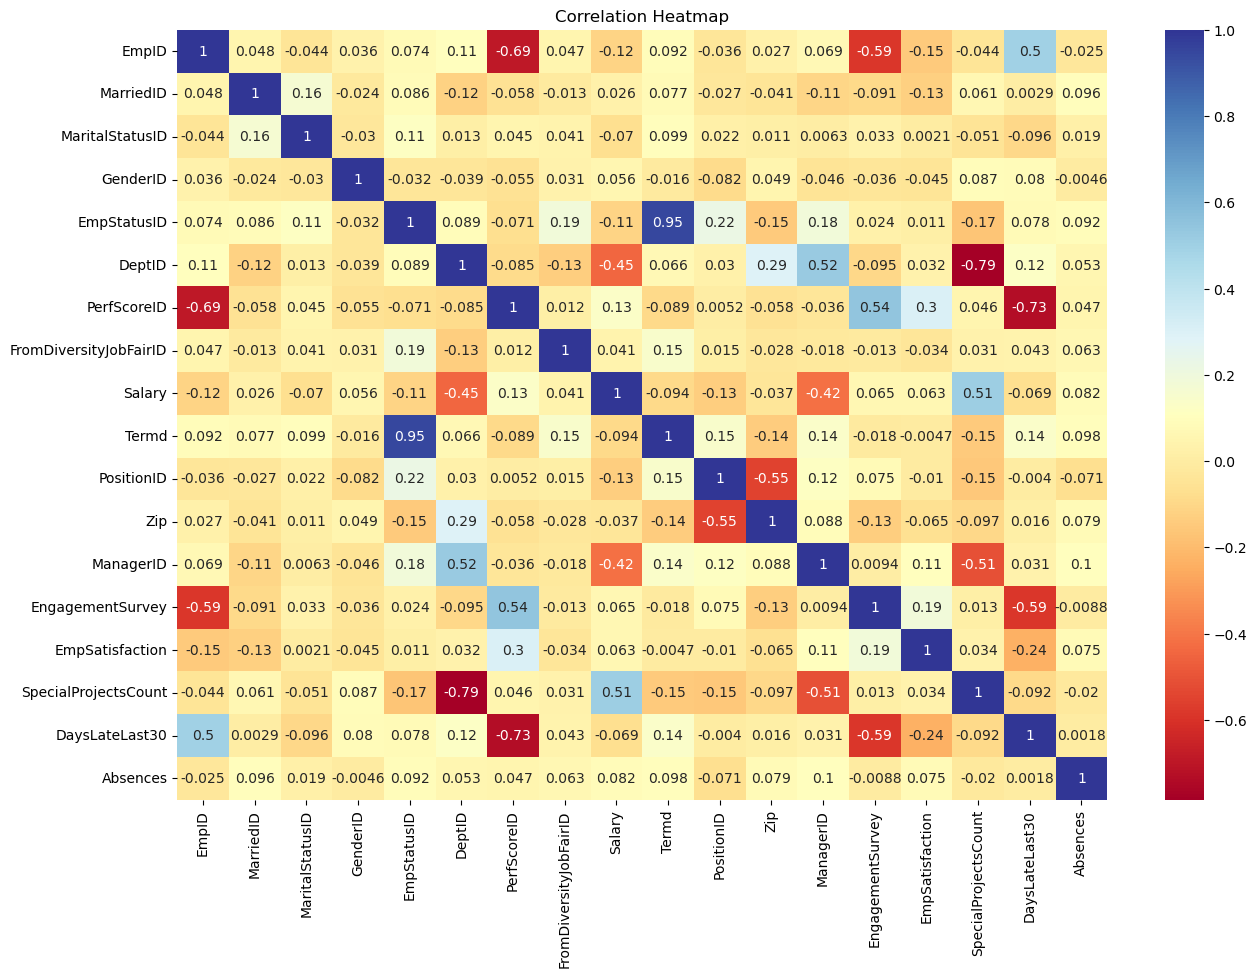

In [92]:
#Calculate  the correlation matrix
correlation_matrix = HR.corr()

# Create the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot = True, cmap = "RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

### Gender Analysis

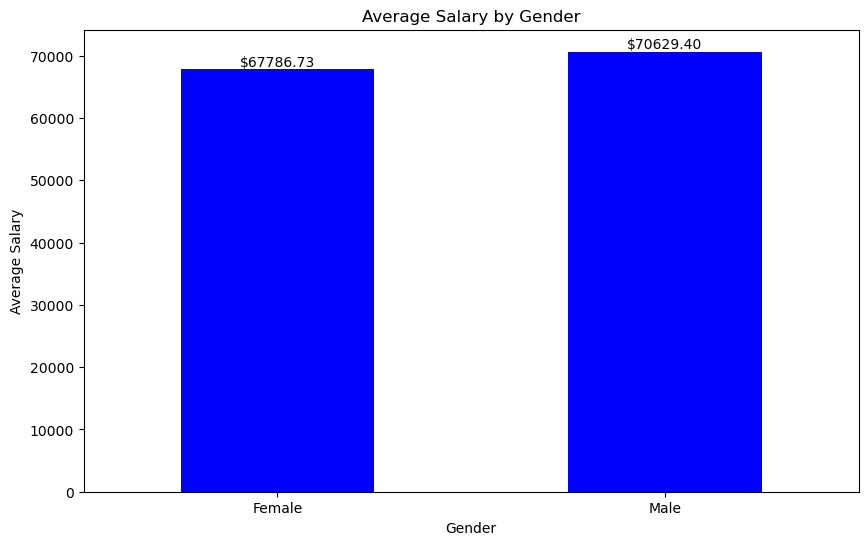

In [164]:
mapping = {0: 'Female', 1: 'Male'}
HR['GenderID'] = HR['GenderID'].replace(mapping)

average_salary = HR.groupby("GenderID")["Salary"].mean()

plt.figure(figsize=(10, 6))  # Adjust the figsize as per your preference
average_salary.plot(kind='bar', color='blue')
plt.title("Average Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)

# Add labels to the bars
for i, value in enumerate(average_salary):
    plt.text(i, value, f"${value:.2f}", ha='center', va='bottom')

plt.show()

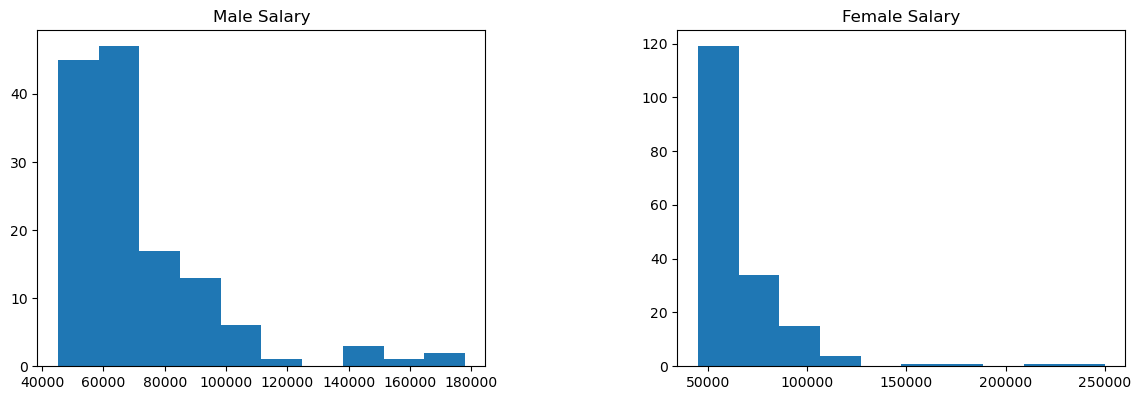

In [94]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.7, 0.7])
ax2 = fig.add_axes([1, 0, 0.7, 0.7])

ax1.hist(male_data["Salary"])
ax2.hist(female_data["Salary"])

ax1.set_title("Male Salary")
ax2.set_title("Female Salary")

plt.show()

In [95]:
female_data = HR[HR["GenderID"] == "Female"]
female_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
2,"Akinkuolie, Sarah",10196,1,1,Female,5,5,3,0,64955,...,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,Female,1,5,3,0,64991,...,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15
4,"Anderson, Carol",10069,0,2,Female,5,5,3,0,50825,...,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2
5,"Anderson, Linda",10002,0,0,Female,1,5,4,0,57568,...,Amy Dunn,11,LinkedIn,Exceeds,5.00,5,0,01/07/2019,0,15
6,"Andreola, Colby",10194,0,0,Female,1,4,3,0,95660,...,Alex Sweetwater,10,LinkedIn,Fully Meets,3.04,3,4,01/02/2019,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,Female,1,5,3,0,60446,...,David Stanley,14,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
307,"Ybarra, Catherine",10301,0,0,Female,5,5,1,0,48513,...,Brannon Miller,12,Google Search,PIP,3.20,2,0,09/02/2015,5,4
308,"Zamora, Jennifer",10010,0,0,Female,1,3,4,0,220450,...,Janet King,2,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,Female,1,3,3,0,89292,...,Simon Roup,4,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11


In [96]:
gen_depart = female_data.groupby(["GenderID"])["Position"].value_counts()
female_10 = gen_depart.head(10)
female_10

GenderID  Position                
Female    Production Technician I     83
          Production Technician II    37
          Area Sales Manager          12
          Production Manager           6
          Software Engineer            6
          IT Support                   5
          Database Administrator       4
          Administrative Assistant     3
          Data Analyst                 3
          Network Engineer             2
Name: Position, dtype: int64

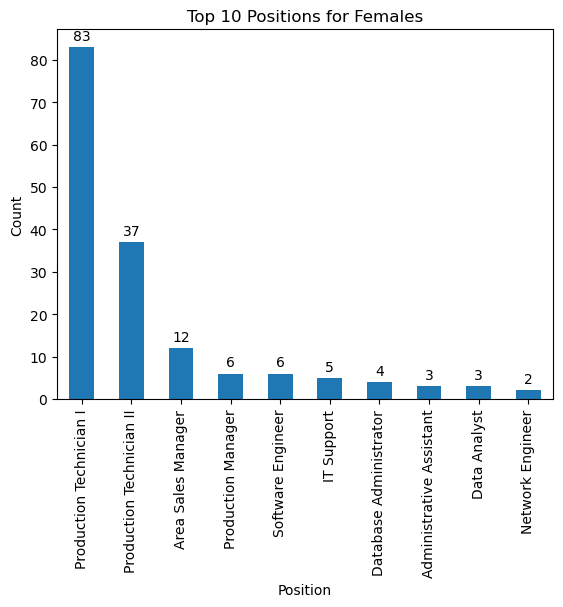

In [97]:
female_bar = female_10.plot(kind='bar', legend=False)

labels = [label[1] for label in female_10.index]
plt.gca().set_xticklabels(labels)

plt.title("Top 10 Positions for Females")
plt.xlabel("Position")
plt.ylabel("Count")

for bar in female_bar.patches:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha="center",
                 va="bottom")

plt.show()

In [98]:
male_data = HR[HR["GenderID"] == "Male"]
male_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,Male,1,5,4,0,62506,...,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,Male,5,3,3,0,104437,...,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
7,"Athwal, Sam",10062,0,4,Male,1,5,3,0,59365,...,Ketsia Liebig,19,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
9,"Bacong, Alejandro",10250,0,2,Male,1,3,3,0,50178,...,Peter Monroe,7,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
11,"Barbara, Thomas",10242,1,1,Male,5,5,3,1,47211,...,Kissy Sullivan,20,Diversity Job Fair,Fully Meets,4.20,3,0,05/06/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Wang, Charlie",10172,0,0,Male,1,3,3,0,84903,...,Brian Champaigne,13,Indeed,Fully Meets,3.42,4,7,01/04/2019,0,17
300,"Whittier, Scott",10072,0,0,Male,5,5,3,0,58371,...,Webster Butler,39,LinkedIn,Fully Meets,5.00,5,0,5/15/2014,0,11
301,"Wilber, Barry",10048,1,1,Male,5,5,3,0,55140,...,Amy Dunn,11,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
304,"Winthrop, Jordan",10033,0,0,Male,5,5,4,0,70507,...,Brannon Miller,12,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


In [99]:
gen_depart1 = male_data.groupby(["GenderID"])["Position"].value_counts()
male_10 = gen_depart1.head(10)

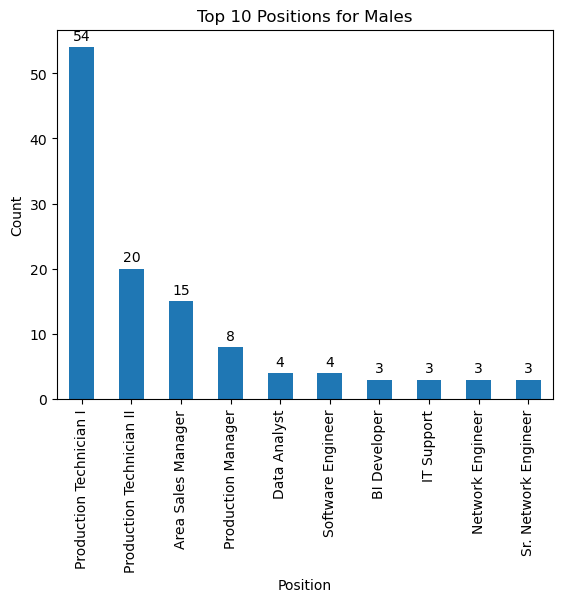

In [100]:
male_bar = male_10.plot(kind='bar', legend=False)

labels = [label[1] for label in male_10.index]
plt.gca().set_xticklabels(labels)

plt.title("Top 10 Positions for Males")
plt.xlabel("Position")
plt.ylabel("Count")

for bar in male_bar.patches:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha="center",
                 va="bottom")

plt.show()

#### All Careers Salary Split by Gender

In [101]:
salary = HR.groupby(["Position", "GenderID"]).agg({"Salary": "mean", "Employee_Name": "count"}).reset_index()
salary = salary.rename(columns={"Employee_Name": "Count"}).sort_values(by="Salary", ascending=False)

In [102]:
salary = HR.groupby(["Position", "GenderID"]).agg({"Salary": "mean", "Employee_Name": "count"}).reset_index()
salary = salary.rename(columns={"Employee_Name": "Count"})

# Split count by gender
gender_counts = salary.groupby(["Position", "GenderID"])["Count"].sum().reset_index()
gender_counts = gender_counts.pivot(index="Position", columns="GenderID", values="Count").reset_index()
gender_counts.columns = ["Position", "Female_Count", "Male_Count"]

# Merge gender counts with the salary DataFrame
salary = pd.merge(salary, gender_counts, on="Position")

salary = salary.sort_values(by="Salary", ascending=False)

salary_df = pd.DataFrame(salary)
salary_df = salary_df.drop(columns = ["GenderID", "Count"])

In [103]:
salary_df

,Position,Salary,Female_Count,Male_Count
26,President & CEO,250000.000000,1.0,NaN
8,CIO,220450.000000,1.0,NaN
16,Director of Sales,180000.000000,1.0,NaN
18,IT Director,178000.000000,NaN,1.0
15,Director of Operations,170500.000000,NaN,1.0
20,IT Manager - Infra,157000.000000,NaN,1.0
12,Data Architect,150290.000000,1.0,NaN
19,IT Manager - DB,144959.500000,NaN,2.0
21,IT Manager - Support,138888.000000,NaN,1.0
27,Principal Data Architect,120000.000000,1.0,NaN


In [104]:
department_gender = HR.groupby(["Department", "GenderID"]).size().reset_index(name="Count")

In [105]:
mapping = {0: 'Female', 1: 'Male'}
department_gender['GenderID'] = department_gender['GenderID'].replace(mapping)
department_gender

,Department,GenderID,Count
0,Admin Offices,Female,6
1,Admin Offices,Male,3
2,Executive Office,Female,1
3,IT/IS,Female,22
4,IT/IS,Male,28
5,Production,Female,126
6,Production,Male,83
7,Sales,Female,15
8,Sales,Male,16
9,Software Engineering,Female,6


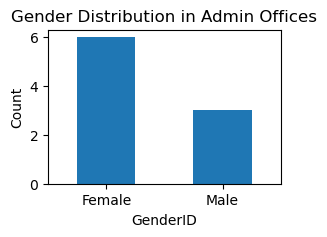

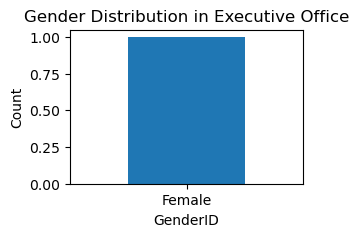

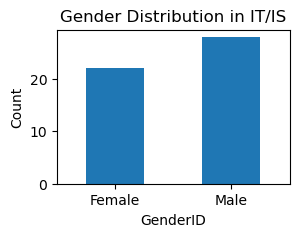

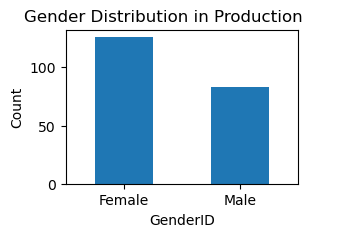

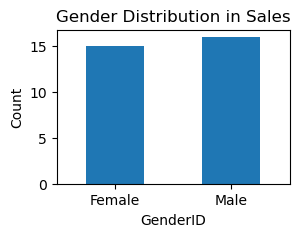

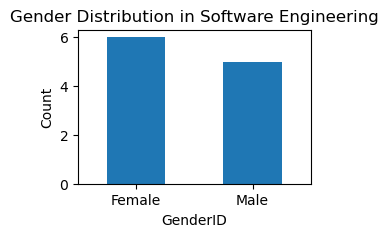

In [106]:
departments = department_gender['Department'].unique()
for department in departments:
    department_data = department_gender[department_gender['Department'] == department]
    
    # Reset the index for the department_data
    department_data = department_data.set_index('GenderID')
    
    # Plot the bar chart for the department with smaller size
    fig, ax = plt.subplots(figsize=(3, 2))  # Adjust the figsize as per your preference
    
    department_data.plot(kind='bar', legend=False, ax=ax)
    plt.title(f'Gender Distribution in {department}')
    plt.xlabel('GenderID')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


## Department and Performance Score

In [107]:
depart_df = HR[["Department","Employee_Name","EmpID","PerformanceScore","EmpSatisfaction", "ManagerName", "TermReason", "DaysLateLast30", "Absences"]]
depart_df
depart_df1 = depart_df.groupby(["ManagerName"])["Employee_Name"].count().reset_index()
depart_df1
depart_df2 = depart_df.groupby(["Department"])["ManagerName"].count().reset_index()
depart_df2

,Department,ManagerName
0,Admin Offices,9
1,Executive Office,1
2,IT/IS,50
3,Production,209
4,Sales,31
5,Software Engineering,11


In [167]:
depart_df1

,ManagerName,Employee_Name
0,Alex Sweetwater,9
1,Amy Dunn,21
2,Board of Directors,2
3,Brandon R. LeBlanc,7
4,Brannon Miller,22
5,Brian Champaigne,8
6,David Stanley,21
7,Debra Houlihan,3
8,Elijiah Gray,22
9,Eric Dougall,4


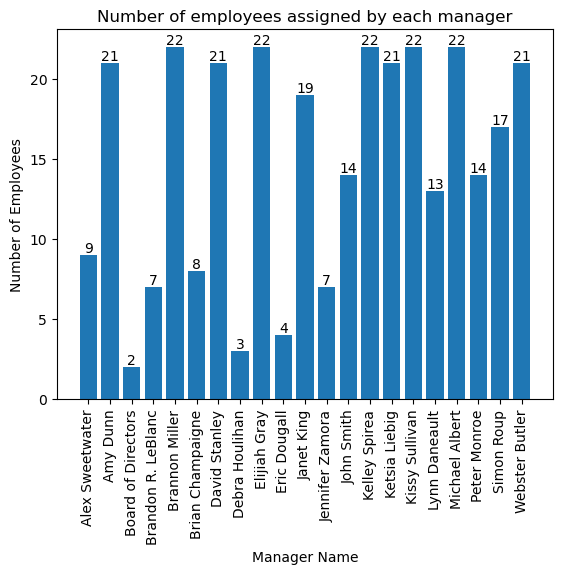

In [170]:
depart_df1 = depart_df1.rename(columns={"Employee_Name": "Count"})

plt.bar(depart_df1["ManagerName"], depart_df1["Count"])
plt.title("Number of employees assigned by each manager")
plt.xlabel("Manager Name")  # Add x-axis label
plt.ylabel("Number of Employees")  # Add y-axis label
plt.xticks(rotation="vertical")

# Add labels to the bars
for i, count in enumerate(depart_df1["Count"]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

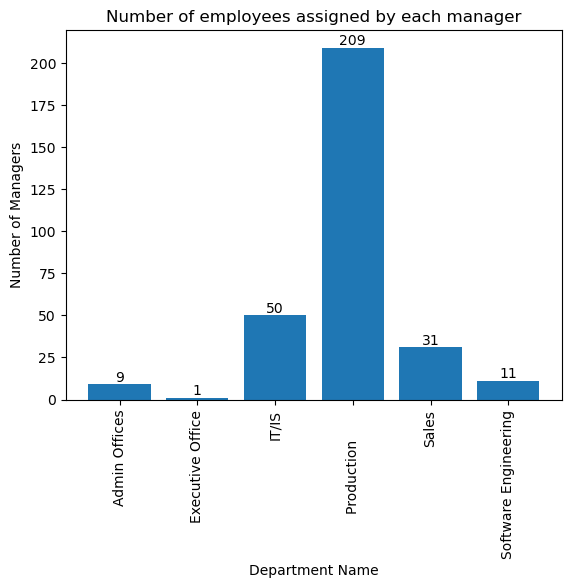

In [171]:
depart_df2 = depart_df2.rename(columns = {"ManagerName": "Count"})

plt.bar(depart_df2["Department"], depart_df2["Count"])
plt.title("Number of employees assigned by each manager")
plt.xlabel("Department Name")  # Add x-axis label
plt.ylabel("Number of Managers")  # Add y-axis label
plt.xticks(rotation="vertical")

for i, count in enumerate(depart_df2["Count"]):
    plt.text(i, count, str(count), ha="center", va= "bottom")
    
plt.show()

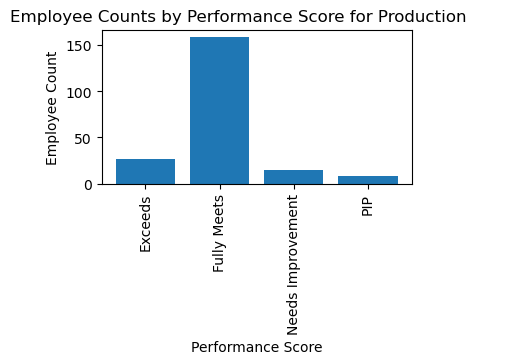

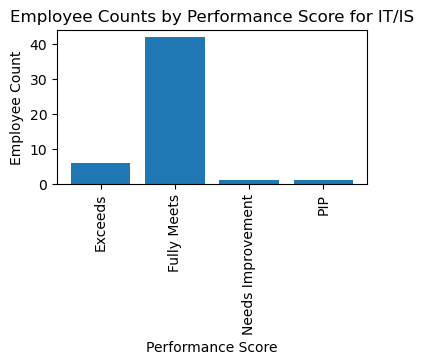

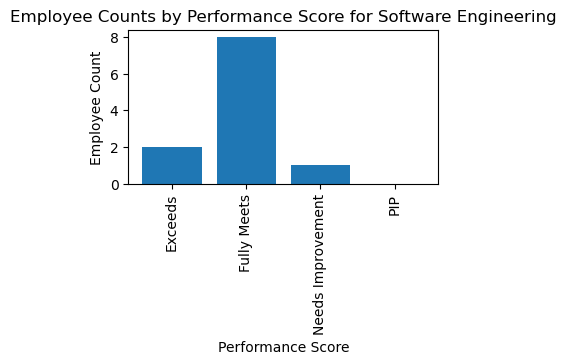

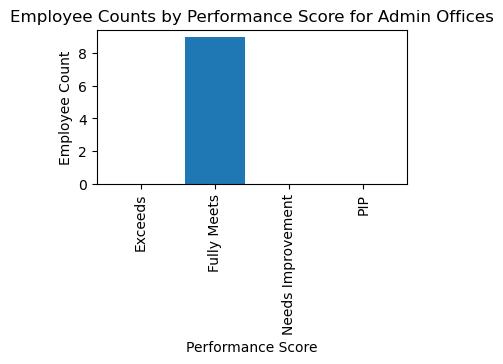

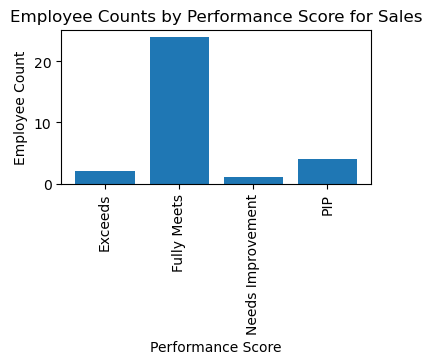

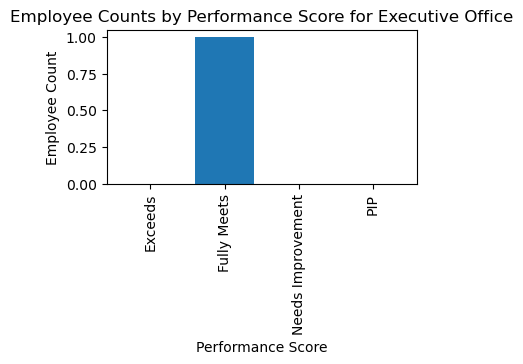

In [108]:
departments = depart_df["Department"].unique()
performance_scores = depart_df["PerformanceScore"].unique()

for department in departments:
    scores = []
    counts = []
    for score in performance_scores:
        count = depart_df[(depart_df["Department"] == department) & (depart_df["PerformanceScore"] == score)]["Employee_Name"].count()
        scores.append(score)
        counts.append(count)

    # Generate the bar chart
    plt.figure(figsize=(4, 2))
    plt.bar(scores, counts)
    plt.title(f"Employee Counts by Performance Score for {department}")
    plt.xlabel("Performance Score")
    plt.ylabel("Employee Count")
    plt.xticks(rotation='vertical')  # Set the rotation to 'vertical'
    plt.show()

#### Number of employees in each Department performing above expectations

In [172]:
exceeds = depart_df[depart_df["PerformanceScore"] == "Exceeds"]
exceeds_1 = exceeds.groupby(["Department"])["PerformanceScore"].count().reset_index()
exceeds_1 = exceeds_1.rename(columns = {"PerformanceScore": "Count"})
exceeds_1 

,Department,Count
0,IT/IS,6
1,Production,27
2,Sales,2
3,Software Engineering,2


#### Number of employees in each Department performing below expectations

In [175]:
needsimprovement = depart_df[depart_df["PerformanceScore"] == "Needs Improvement"]
needs_improvement_1 = needsimprovement.groupby(["Department"])["PerformanceScore"].count().reset_index()
needs_improvement_1 = needs_improvement_1.rename(columns = {"PerformanceScore": "Count"})
needs_improvement_1

,Department,Count
0,IT/IS,1
1,Production,15
2,Sales,1
3,Software Engineering,1


In [111]:
production = exceeds[exceeds["Department"] == "Production       "]

#### Number of employees per Production performing above expectations

In [112]:
production

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
0,Production,"Adinolfi, Wilson K",10026,Exceeds,5,Michael Albert,N/A-StillEmployed,0,1
5,Production,"Anderson, Linda",10002,Exceeds,5,Amy Dunn,N/A-StillEmployed,0,15
16,Production,"Beak, Kimberly",10023,Exceeds,3,Kelley Spirea,N/A-StillEmployed,0,16
22,Production,"Billis, Helen",10003,Exceeds,3,Brannon Miller,N/A-StillEmployed,0,19
36,Production,"Candie, Calvin",10001,Exceeds,3,Janet King,N/A-StillEmployed,0,14
51,Production,"Clukey, Elijian",10029,Exceeds,4,Brannon Miller,N/A-StillEmployed,0,5
55,Production,"Corleone, Vito",10019,Exceeds,5,Janet King,N/A-StillEmployed,0,15
106,Production,"Girifalco, Evelyn",10018,Exceeds,4,Amy Dunn,N/A-StillEmployed,0,3
111,Production,"Gonzalez, Cayo",10031,Exceeds,4,Brannon Miller,N/A-StillEmployed,0,1
125,Production,"Harrison, Kara",10007,Exceeds,4,Amy Dunn,N/A-StillEmployed,0,5


#### Number of employees per IT performing above expectations

In [113]:
IT = exceeds[exceeds["Department"] == "IT/IS"]
IT

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
12,IT/IS,"Barbossa, Hector",10012,Exceeds,4,Simon Roup,N/A-StillEmployed,0,9
76,IT/IS,"Dougall, Eric",10028,Exceeds,5,Jennifer Zamora,N/A-StillEmployed,0,4
96,IT/IS,"Foss, Jason",10015,Exceeds,5,Jennifer Zamora,N/A-StillEmployed,0,15
170,IT/IS,"Lindsay, Leonara",10008,Exceeds,4,Eric Dougall,N/A-StillEmployed,0,14
220,IT/IS,"Petrowsky, Thelma",10016,Exceeds,5,Simon Roup,N/A-StillEmployed,0,16
308,IT/IS,"Zamora, Jennifer",10010,Exceeds,5,Janet King,N/A-StillEmployed,0,16


#### Number of employees per Sales performing ahead of expectations

In [114]:
Sales = exceeds[exceeds["Department"] == "Sales"]
Sales

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
77,Sales,"Driver, Elle",10006,Exceeds,5,Lynn Daneault,N/A-StillEmployed,0,14
282,Sales,"Torrence, Jack",10013,Exceeds,3,Lynn Daneault,N/A-StillEmployed,0,6


#### Number of employees per Software Engineer performing ahead of expectations

In [115]:
Software_engineer = exceeds[exceeds["Department"] == "Software Engineering"]
Software_engineer

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
212,Software Engineering,"Patronick, Lucas",10005,Exceeds,5,Alex Sweetwater,Another position,0,13
274,Software Engineering,"Szabo, Andrew",10024,Exceeds,5,Alex Sweetwater,N/A-StillEmployed,0,1


#### Number of employees per Manager which are performing ahead of expectations

In [116]:
exceeds_2 = exceeds.groupby(["ManagerName"])["Employee_Name"].count().reset_index()
exceeds_2

,ManagerName,Employee_Name
0,Alex Sweetwater,2
1,Amy Dunn,3
2,Brannon Miller,7
3,David Stanley,1
4,Elijiah Gray,2
5,Eric Dougall,1
6,Janet King,4
7,Jennifer Zamora,2
8,Kelley Spirea,3
9,Ketsia Liebig,2


#### Number of employees per Manager which are not performing enough

In [117]:
needs_improvement_2 = needsimprovement.groupby(["ManagerName"])["Employee_Name"].count().reset_index()
needs_improvement_2

,ManagerName,Employee_Name
0,Alex Sweetwater,1
1,Amy Dunn,1
2,Brannon Miller,1
3,David Stanley,1
4,Debra Houlihan,1
5,Elijiah Gray,2
6,Janet King,2
7,Jennifer Zamora,1
8,Kelley Spirea,1
9,Ketsia Liebig,1


#### Workers with unsatisfactory performance scores in Production

In [118]:
production2 = needsimprovement[needsimprovement["Department"] == "Production       "]
production2

,Department,Employee_Name,EmpID,PerformanceScore,EmpSatisfaction,ManagerName,TermReason,DaysLateLast30,Absences
23,Production,"Blount, Dianna",10294,Needs Improvement,3,Michael Albert,N/A-StillEmployed,2,3
53,Production,"Cole, Spencer",10292,Needs Improvement,3,Kissy Sullivan,performance,5,16
54,Production,"Corleone, Michael",10282,Needs Improvement,2,Janet King,N/A-StillEmployed,3,3
73,Production,"DiNocco, Lily",10284,Needs Improvement,4,Brannon Miller,N/A-StillEmployed,0,6
84,Production,"Estremera, Miguel",10280,Needs Improvement,4,Michael Albert,attendance,5,16
85,Production,"Evensen, April",10296,Needs Improvement,3,Elijiah Gray,"no-call, no-show",5,19
105,Production,"Gilles, Alex",10283,Needs Improvement,4,Webster Butler,military,3,15
137,Production,"Immediato, Walter",10289,Needs Improvement,2,Janet King,unhappy,3,4
209,Production,"Owad, Clinton",10281,Needs Improvement,3,Michael Albert,N/A-StillEmployed,4,6
214,Production,"Smith, Martin",10286,Needs Improvement,5,Webster Butler,career change,4,15


### Employees terminated per department

In [119]:
termin_df = HR[["Employee_Name", "EmpID", "Department", "EmploymentStatus", "TermReason"]]
termin_df

,Employee_Name,EmpID,Department,EmploymentStatus,TermReason
0,"Adinolfi, Wilson K",10026,Production,Active,N/A-StillEmployed
1,"Ait Sidi, Karthikeyan",10084,IT/IS,Voluntarily Terminated,career change
2,"Akinkuolie, Sarah",10196,Production,Voluntarily Terminated,hours
3,"Alagbe,Trina",10088,Production,Active,N/A-StillEmployed
4,"Anderson, Carol",10069,Production,Voluntarily Terminated,return to school
...,...,...,...,...,...
306,"Woodson, Jason",10135,Production,Active,N/A-StillEmployed
307,"Ybarra, Catherine",10301,Production,Voluntarily Terminated,Another position
308,"Zamora, Jennifer",10010,IT/IS,Active,N/A-StillEmployed
309,"Zhou, Julia",10043,IT/IS,Active,N/A-StillEmployed


In [186]:
termin_df2 = termin_df[termin_df["EmploymentStatus"] == "Terminated for Cause"]
termin_df3 = termin_df[termin_df["EmploymentStatus"] == "Voluntarily Terminated"]

depart_termin2 = termin_df2.groupby(["Department"])["EmploymentStatus"].count().reset_index()
depart_termin3 = termin_df3.groupby(["Department"])["EmploymentStatus"].count().reset_index()

# Merge depart_termin2 and depart_termin3 based on "Department" column
depart_termin_total = pd.merge(depart_termin2, depart_termin3, on="Department", how="outer")

# Add the two counts together to get the total
depart_termin_total["TotalTerminated"] = depart_termin_total["EmploymentStatus_x"] + depart_termin_total["EmploymentStatus_y"]

# Rename the columns
depart_termin_total = depart_termin_total.rename(columns={"TotalTerminated": "Total_Terminated"})

# Drop unnecessary columns
depart_termin_total = depart_termin_total.drop(columns=["EmploymentStatus_x", "EmploymentStatus_y"])

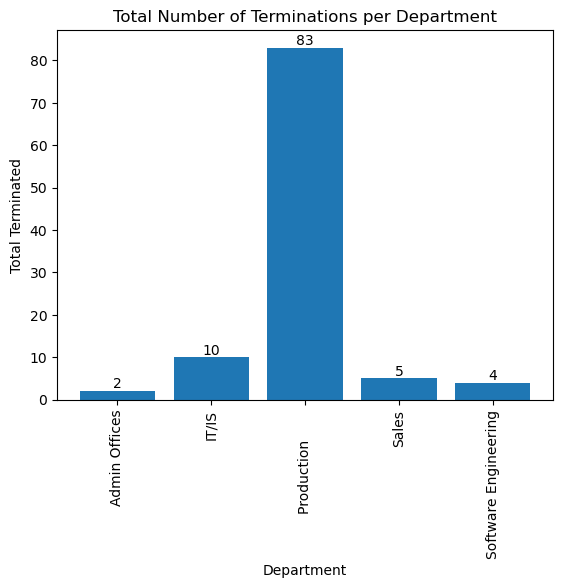

In [190]:
depart_termin_total

plt.bar(depart_termin_total["Department"], depart_termin_total["Total_Terminated"])

# Add x-axis label
plt.xlabel("Department")
# Add y-axis label
plt.ylabel("Total Terminated")

# Rotate x-axis labels vertically
plt.xticks(rotation="vertical")

# Add labels to the bars
for i, value in enumerate(depart_termin_total["Total_Terminated"]):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Add a title
plt.title("Total Number of Terminations per Department")

plt.show()

In [182]:
termin = pd.DataFrame(termin_df3.TermReason.value_counts().reset_index())
termin = termin.rename(columns = {"TermReason": "Count", "index": "Term_Reason"})
termin

,Term_Reason,Count
0,Another position,20
1,unhappy,14
2,more money,11
3,career change,9
4,hours,8
5,return to school,5
6,relocation out of area,5
7,retiring,4
8,military,4
9,maternity leave - did not return,3


Text(0, 0.5, 'Count')

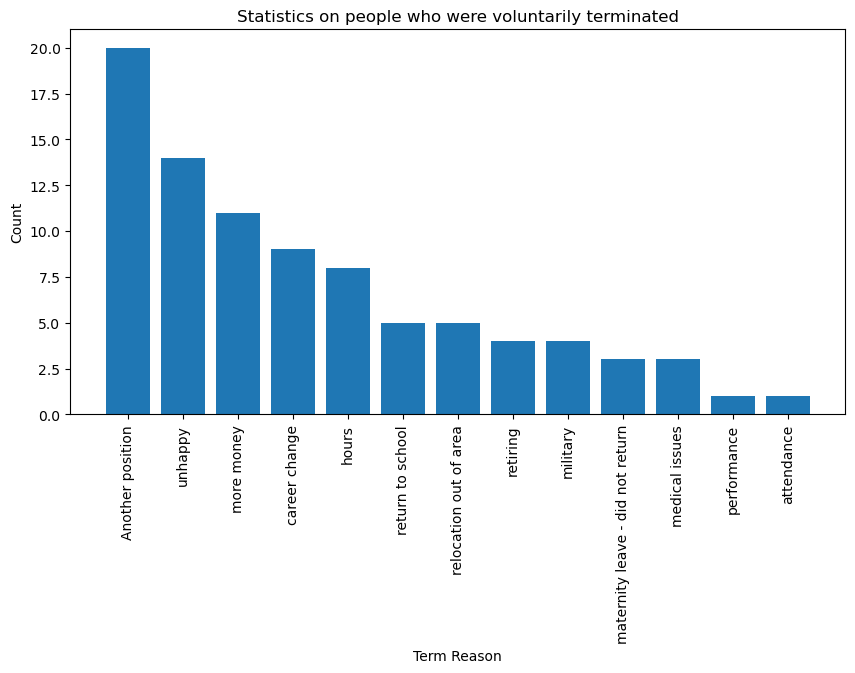

In [183]:
plt.figure(figsize = (10,5))
plt.bar(termin["Term_Reason"], height = termin["Count"])
plt.xticks(rotation = "vertical")

plt.title("Statistics on people who were voluntarily terminated")
plt.xlabel("Term Reason")
plt.ylabel("Count")

In [184]:
termin_1 = pd.DataFrame(termin_df2.TermReason.value_counts().reset_index())

termin_1 = termin_1.rename(columns = {"TermReason": "Count", "index": "Term_Reason"})
termin_1

,Term_Reason,Count
0,attendance,6
1,"no-call, no-show",4
2,performance,3
3,Learned that he is a gangster,1
4,Fatal attraction,1
5,gross misconduct,1


Text(0, 0.5, 'Count')

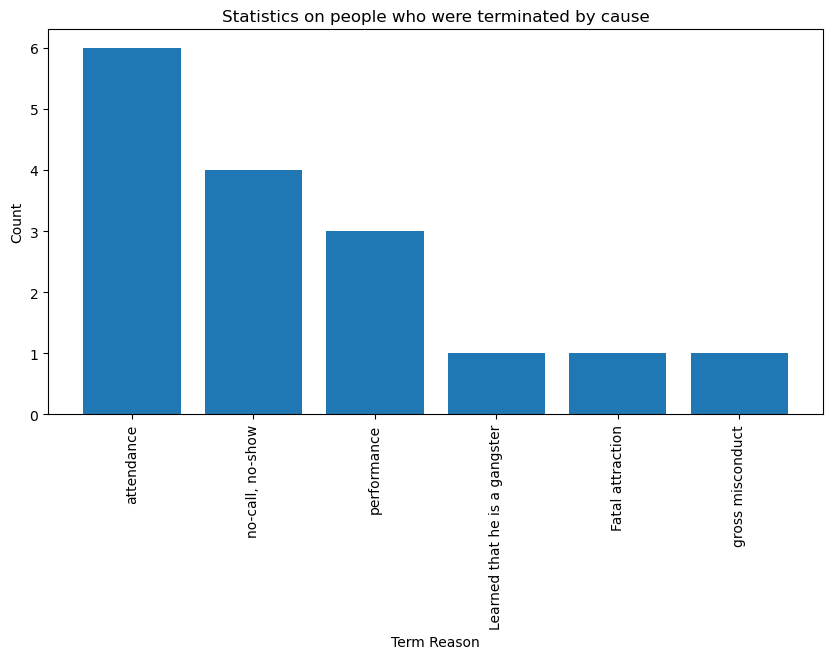

In [185]:
plt.figure(figsize = (10,5))
plt.bar(termin_1["Term_Reason"], height = termin_1["Count"])
plt.xticks(rotation = "vertical")

plt.title("Statistics on people who were terminated by cause")
plt.xlabel("Term Reason")
plt.ylabel("Count")

In [126]:
termin_df["Department"] = HR["Department"]

C:\Users\rgs88\AppData\Local\Temp\ipykernel_9388\3518673272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  termin_df["Department"] = HR["Department"]


In [127]:
depart_terminv = termin_df[termin_df["EmploymentStatus"] == "Voluntarily Terminated"].groupby("Department").size().reset_index(name="Voluntary_Termination_Count")
depart_terminv

depart_terminc = termin_df[termin_df["EmploymentStatus"] == "Terminated for Cause"].groupby("Department").size().reset_index(name="Termination_for_Cause_Count")
depart_terminc

,Department,Termination_for_Cause_Count
0,Admin Offices,1
1,IT/IS,4
2,Production,8
3,Sales,2
4,Software Engineering,1


In [128]:
departed_termin = depart_terminv.join(depart_terminc.set_index("Department"), on="Department")
departed_termin

departed_termin["Total_Number_Terminated"] = departed_termin["Voluntary_Termination_Count"] + departed_termin["Termination_for_Cause_Count"]
departed_termin

,Department,Voluntary_Termination_Count,Termination_for_Cause_Count,Total_Number_Terminated
0,Admin Offices,1,1,2
1,IT/IS,6,4,10
2,Production,75,8,83
3,Sales,3,2,5
4,Software Engineering,3,1,4


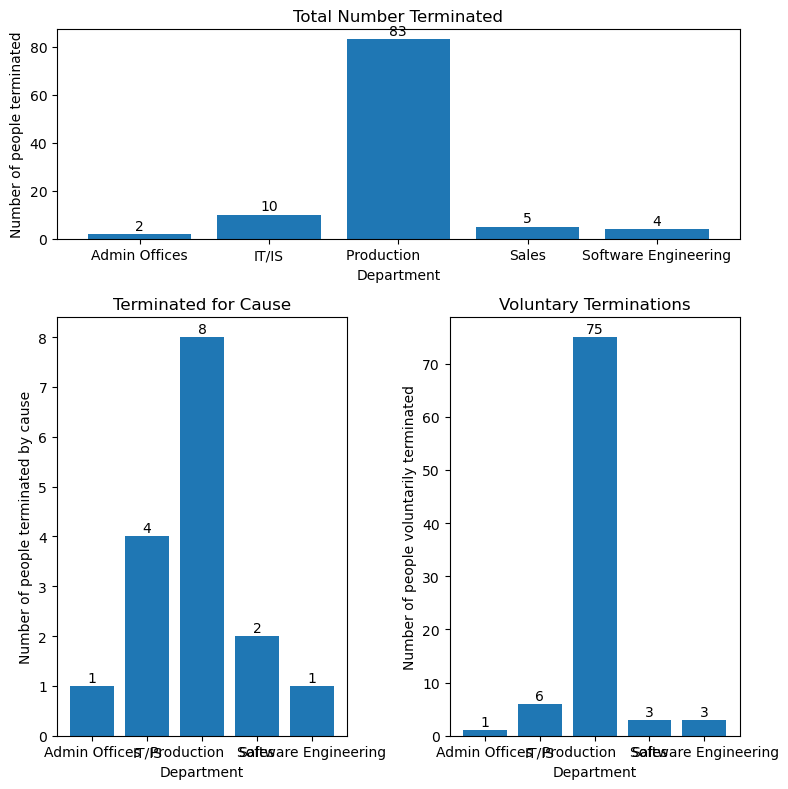

In [129]:
from matplotlib.gridspec import GridSpec

# Create the figure and define the grid layout
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 2])

# Plot the first graph at the top
ax1 = fig.add_subplot(gs[0, :])
ax1.bar(departed_termin["Department"], departed_termin["Total_Number_Terminated"])
ax1.set_xlabel("Department")
ax1.set_ylabel("Number of people terminated")
ax1.set_title("Total Number Terminated")

# Annotate the height values on the first graph
for i, height in enumerate(departed_termin["Total_Number_Terminated"]):
    ax1.annotate(str(height), xy=(i, height), xytext=(0, 3), textcoords="offset points", ha='center')

# Plot the second graph on the bottom left
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(departed_termin["Department"], departed_termin["Termination_for_Cause_Count"])
ax2.set_xlabel("Department")
ax2.set_ylabel("Number of people terminated by cause")
ax2.set_title("Terminated for Cause")

# Annotate the height values on the second graph
for i, height in enumerate(departed_termin["Termination_for_Cause_Count"]):
    ax2.annotate(str(height), xy=(i, height), xytext=(0, 3), textcoords="offset points", ha='center')

# Plot the third graph on the bottom right
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(departed_termin["Department"], departed_termin["Voluntary_Termination_Count"])
ax3.set_xlabel("Department")
ax3.set_ylabel("Number of people voluntarily terminated")
ax3.set_title("Voluntary Terminations")

# Annotate the height values on the third graph
for i, height in enumerate(departed_termin["Voluntary_Termination_Count"]):
    ax3.annotate(str(height), xy=(i, height), xytext=(0, 3), textcoords="offset points", ha='center')

# Remove the unused subplot
#fig.delaxes(ax3)

plt.tight_layout()
plt.show()





### Manager Analysis

In [130]:
manager_df = HR[["ManagerName", "ManagerID", "EngagementSurvey", "EmpSatisfaction"]]
manager_df

,ManagerName,ManagerID,EngagementSurvey,EmpSatisfaction
0,Michael Albert,22,4.60,5
1,Simon Roup,4,4.96,3
2,Kissy Sullivan,20,3.02,3
3,Elijiah Gray,16,4.84,5
4,Webster Butler,39,5.00,4
...,...,...,...,...
306,Kissy Sullivan,20,4.07,4
307,Brannon Miller,12,3.20,2
308,Janet King,2,4.60,5
309,Simon Roup,4,5.00,3


In [131]:
top_managers_engagement = manager_df.groupby(["ManagerName", "ManagerID"])["EngagementSurvey"].mean().reset_index().head(10).sort_values("EngagementSurvey", ascending = False)
top_managers_engagement

,ManagerName,ManagerID,EngagementSurvey
2,Board of Directors,9,4.915000
9,Eric Dougall,6,4.585000
3,Brandon R. LeBlanc,1,4.348571
6,David Stanley,14,4.150952
0,Alex Sweetwater,10,4.076667
8,Elijiah Gray,16,4.074545
5,Brian Champaigne,13,4.058750
4,Brannon Miller,12,4.041818
1,Amy Dunn,11,3.924762
7,Debra Houlihan,15,3.840000


In [135]:
top_managers_satisfaction = manager_df.groupby(["ManagerName", "ManagerID"])["EmpSatisfaction"].mean().reset_index().head(10).sort_values("EmpSatisfaction", ascending = False)
top_managers_satisfaction

,ManagerName,ManagerID,EmpSatisfaction
7,Debra Houlihan,15,4.333333
0,Alex Sweetwater,10,4.222222
5,Brian Champaigne,13,4.000000
8,Elijiah Gray,16,3.954545
6,David Stanley,14,3.952381
1,Amy Dunn,11,3.809524
3,Brandon R. LeBlanc,1,3.571429
9,Eric Dougall,6,3.500000
4,Brannon Miller,12,3.409091
2,Board of Directors,9,3.000000


### Employees which need Review

In [139]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    object 
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [152]:
review_df = HR[["Employee_Name", "EmpID", "DateofHire", "LastPerformanceReview_Date", "EmploymentStatus", "Absences", "DaysLateLast30", "EngagementSurvey"]]

review_df["DateofHire"] = pd.to_datetime(review_df["DateofHire"])

# Convert the column to datetime format
review_df["LastPerformanceReview_Date"] = pd.to_datetime(review_df["LastPerformanceReview_Date"], errors = "coerce")
review_df
review_df["LastPerformanceReview_Year"] = review_df["LastPerformanceReview_Date"].dt.year
review_df["LastPerformanceReview_Month"] = review_df["LastPerformanceReview_Date"].dt.month
review_df["LastPerformanceReview_Day"] = review_df["LastPerformanceReview_Date"].dt.day
review_df["LastPerformanceReview_MonthYear"] = review_df["LastPerformanceReview_Date"].dt.strftime("%m/%Y")

review_df

C:\Users\rgs88\AppData\Local\Temp\ipykernel_9388\2252657773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["DateofHire"] = pd.to_datetime(review_df["DateofHire"])
C:\Users\rgs88\AppData\Local\Temp\ipykernel_9388\2252657773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["LastPerformanceReview_Date"] = pd.to_datetime(review_df["LastPerformanceReview_Date"], errors = "coerce")
C:\Users\rgs88\AppData\Local\Temp\ipykernel_9388\2252657773.py:8: SettingWithCopyWarning: 
A value is try

,Employee_Name,EmpID,DateofHire,LastPerformanceReview_Date,EmploymentStatus,Absences,DaysLateLast30,EngagementSurvey,LastPerformanceReview_Year,LastPerformanceReview_Month,LastPerformanceReview_Day,LastPerformanceReview_MonthYear
0,"Adinolfi, Wilson K",10026,2011-07-05,2019-01-17,Active,1,0,4.60,2019.0,1.0,17.0,01/2019
1,"Ait Sidi, Karthikeyan",10084,2015-03-30,2016-02-24,Voluntarily Terminated,17,0,4.96,2016.0,2.0,24.0,02/2016
2,"Akinkuolie, Sarah",10196,2011-07-05,2012-05-15,Voluntarily Terminated,3,0,3.02,2012.0,5.0,15.0,05/2012
3,"Alagbe,Trina",10088,2008-01-07,2019-01-03,Active,15,0,4.84,2019.0,1.0,3.0,01/2019
4,"Anderson, Carol",10069,2011-07-11,2016-02-01,Voluntarily Terminated,2,0,5.00,2016.0,2.0,1.0,02/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,2014-07-07,2019-02-28,Active,13,0,4.07,2019.0,2.0,28.0,02/2019
307,"Ybarra, Catherine",10301,2008-09-02,2015-09-02,Voluntarily Terminated,4,5,3.20,2015.0,9.0,2.0,09/2015
308,"Zamora, Jennifer",10010,2010-04-10,2019-02-21,Active,16,0,4.60,2019.0,2.0,21.0,02/2019
309,"Zhou, Julia",10043,2015-03-30,2019-02-01,Active,11,0,5.00,2019.0,2.0,1.0,02/2019


In [153]:
review = review_df[review_df["EmploymentStatus"] == "Active"]

need_reviews1 = review[review["LastPerformanceReview_MonthYear"] == "01/2019"]
need_reviews2 = need_reviews1[need_reviews1["LastPerformanceReview_Day"] <= 15]

need_reviews3 = need_reviews2[need_reviews2["EngagementSurvey"] < 4.00]
need_reviews3

final_review = need_reviews3[need_reviews3["Absences"] >= 10]

final_review = final_review.drop(columns = {"EmpID", ""})

,Employee_Name,EmpID,DateofHire,LastPerformanceReview_Date,EmploymentStatus,Absences,DaysLateLast30,EngagementSurvey,LastPerformanceReview_Year,LastPerformanceReview_Month,LastPerformanceReview_Day,LastPerformanceReview_MonthYear
6,"Andreola, Colby",10194,2014-11-10,2019-01-02,Active,19,0,3.04,2019.0,1.0,2.0,01/2019
34,"Burkett, Benjamin",10181,2011-04-04,2019-01-14,Active,15,0,3.25,2019.0,1.0,14.0,01/2019
90,"Fernandes, Nilson",10308,2015-05-11,2019-01-03,Active,15,6,1.56,2019.0,1.0,3.0,01/2019
138,"Ivey, Rose",10139,2013-08-19,2019-01-14,Active,14,0,3.99,2019.0,1.0,14.0,01/2019
189,"Monkfish, Erasumus",10213,2011-11-07,2019-01-08,Active,14,0,3.70,2019.0,1.0,8.0,01/2019
254,"Simard, Kramer",10178,2015-01-05,2019-01-14,Active,16,0,3.32,2019.0,1.0,14.0,01/2019
262,"Soze, Keyser",10180,2016-06-30,2019-01-14,Active,13,0,3.27,2019.0,1.0,14.0,01/2019
275,"Tannen, Biff",10173,2017-04-20,2019-01-02,Active,14,0,3.40,2019.0,1.0,2.0,01/2019
298,"Wang, Charlie",10172,2017-02-15,2019-01-04,Active,17,0,3.42,2019.0,1.0,4.0,01/2019


In [154]:
review_df.columns

Index(['Employee_Name', 'EmpID', 'DateofHire', 'LastPerformanceReview_Date',
       'EmploymentStatus', 'Absences', 'DaysLateLast30', 'EngagementSurvey',
       'LastPerformanceReview_Year', 'LastPerformanceReview_Month',
       'LastPerformanceReview_Day', 'LastPerformanceReview_MonthYear'],
      dtype='object')

### Descriptive Statistics on Salary

In [155]:
hr_df = pd.DataFrame(describe(HR["Salary"])._asdict())

In [156]:
salary_ds = describe(HR["Salary"])._asdict()
display(pd.DataFrame([salary_ds], columns = salary_ds.keys()))

,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(45046, 250000)",69020.684887,6.328564e+08,3.290213,15.185607


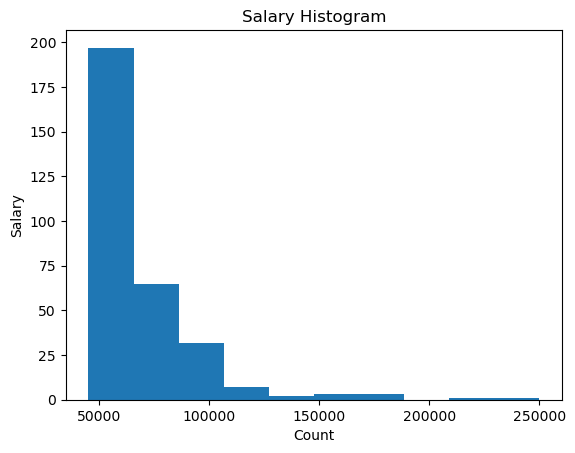

In [191]:
plt.hist(HR["Salary"])
plt.xlabel("Count")
plt.ylabel("Salary")
plt.title("Salary Histogram")
plt.show()

### Descriptive Statistics on Engagement and Employee Satisfaction

In [158]:
HR["EngagementSurvey"]

0      4.60
1      4.96
2      3.02
3      4.84
4      5.00
       ... 
306    4.07
307    3.20
308    4.60
309    5.00
310    4.50
Name: EngagementSurvey, Length: 311, dtype: float64

In [159]:
# Descriptive Statistics on Employee Satisfaction
engagement_ds = describe(HR["EngagementSurvey"])._asdict()
display(pd.DataFrame([engagement_ds], columns=engagement_ds.keys()))

esatis_ds = describe(HR["EmpSatisfaction"])._asdict()
display(pd.DataFrame([esatis_ds], columns=esatis_ds.keys()))


,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(1.12, 5.0)",4.11,0.624001,-1.111585,1.12669


,nobs,minmax,mean,variance,skewness,kurtosis
0,311,"(1, 5)",3.890675,0.826719,-0.221534,-0.769625


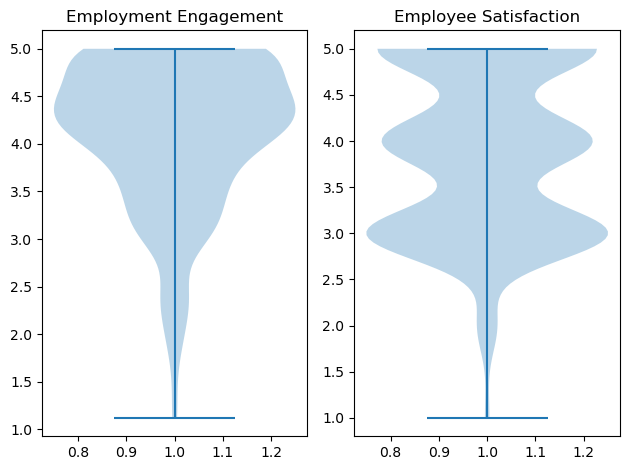

In [160]:
fig, axs = plt.subplots(1, 2)

axs[0].violinplot(HR["EngagementSurvey"])
axs[0].set_title("Employment Engagement")

axs[1].violinplot(HR["EmpSatisfaction"])
axs[1].set_title("Employee Satisfaction")

plt.tight_layout()
plt.show()

### Correlation between engagement x performance and salary x performance

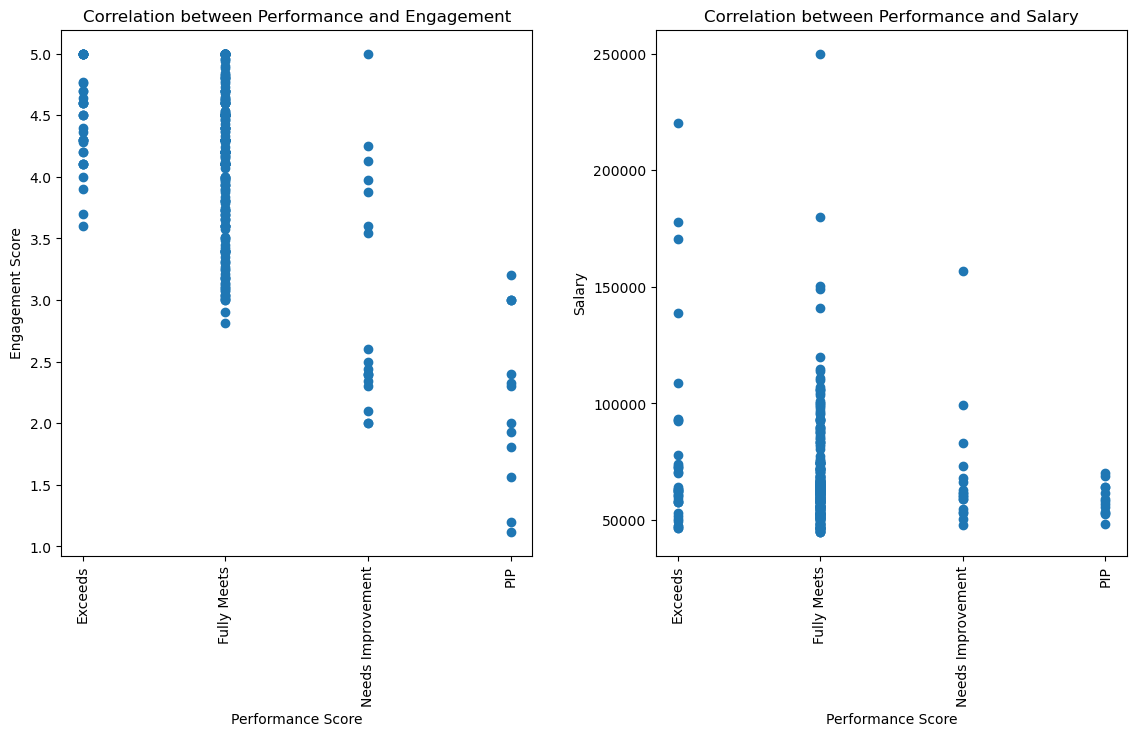

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))  # Increase the figure size if needed

axs[0].scatter(HR["PerformanceScore"], HR["EngagementSurvey"])
axs[0].set_title("Correlation between Performance and Engagement")
axs[0].set_xlabel("Performance Score")  # Add x-axis label
axs[0].set_ylabel("Engagement Score")  # Add y-axis label
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

axs[1].scatter(HR["PerformanceScore"], HR["Salary"])
axs[1].set_title("Correlation between Performance and Salary")
axs[1].set_xlabel("Performance Score")  # Add x-axis label
axs[1].set_ylabel("Salary")  # Add y-axis label
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout(pad=3)  # Increase the padding between subplots

plt.show()

### Correlation between number of Special Projects and Salary

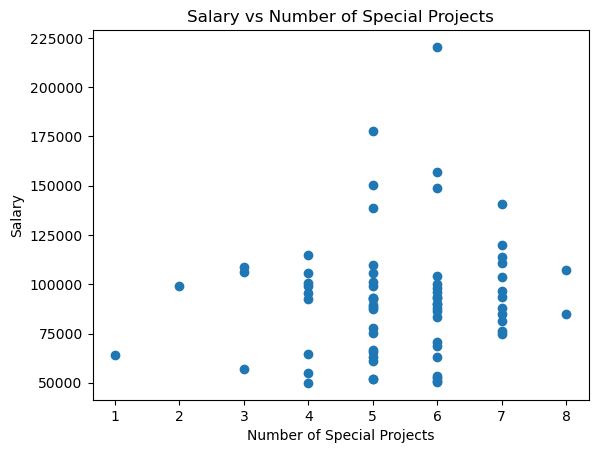

In [193]:
special_projects = HR[HR["SpecialProjectsCount"] > 0]

plt.scatter(special_projects["SpecialProjectsCount"], special_projects["Salary"])
plt.xlabel("Number of Special Projects")
plt.ylabel("Salary")
plt.title("Salary vs Number of Special Projects")

plt.show()

### Correlation between Absences, DaysLate30 and PerformanceScore

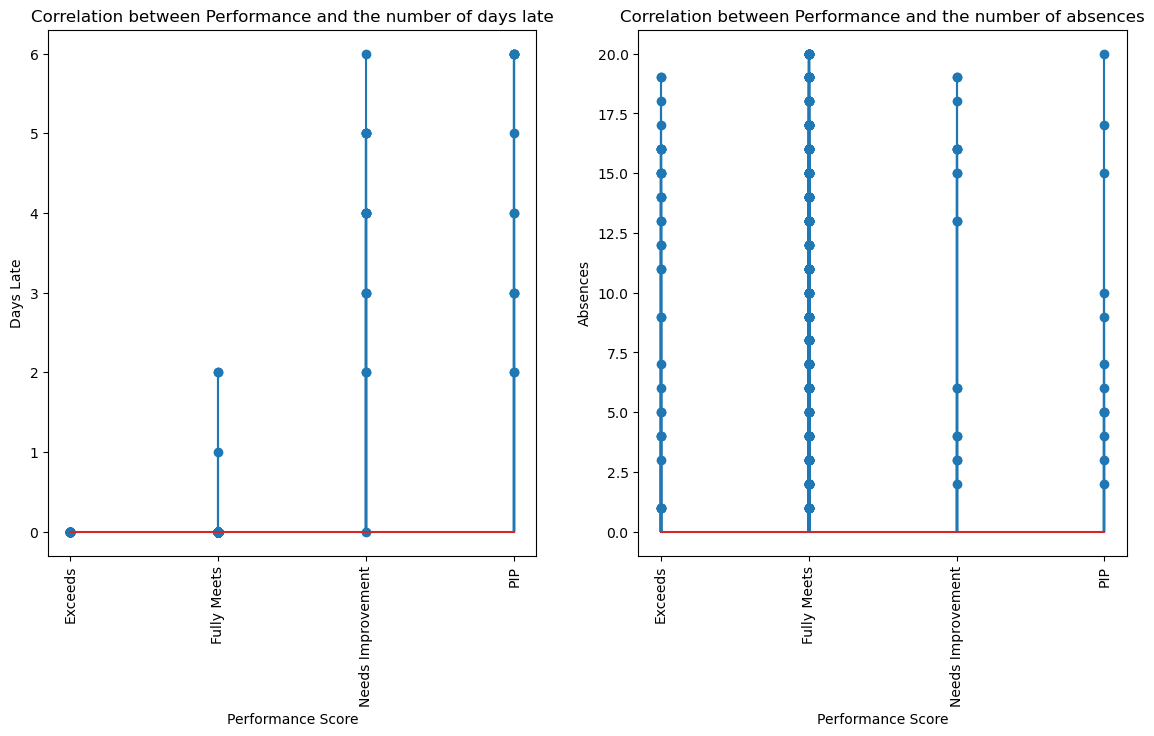

In [194]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))  # Increase the figure size if needed

axs[0].stem(HR["PerformanceScore"], HR["DaysLateLast30"])
axs[0].set_title("Correlation between Performance and the number of days late")
axs[0].set_xlabel("Performance Score")  # Add x-axis label
axs[0].set_ylabel("Days Late")  # Add y-axis label
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

axs[1].stem(HR["PerformanceScore"], HR["Absences"])
axs[1].set_title("Correlation between Performance and the number of absences")
axs[1].set_xlabel("Performance Score")  # Add x-axis label
axs[1].set_ylabel("Absences")  # Add y-axis label
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout(pad=3)  # Increase the padding between subplots

plt.show()